In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [3]:
values = pd.read_csv('../csv/train_values.csv')
values.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500,...,406413,16485,157370,119565,141871,903120,864809,252816,33651,90130
geo_level_1_id,6,8,21,22,11,8,9,20,0,26,...,25,20,6,10,18,21,13,17,6,4
geo_level_2_id,487,900,363,418,131,558,475,323,757,886,...,843,953,706,405,256,336,305,303,1210,1218
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994,...,5236,6651,11722,5132,3430,5107,5956,4121,9423,2175
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1,...,2,2,2,2,2,2,2,3,3,2
age,30,10,10,10,30,10,25,0,15,0,...,35,15,20,10,15,25,0,0,40,0
area_percentage,6,8,5,6,8,9,3,8,8,13,...,11,13,4,3,7,5,9,10,5,9
height_percentage,5,7,5,5,9,5,4,6,6,4,...,5,5,4,6,5,4,8,7,7,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t,...,t,t,t,t,t,t,t,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i,...,r,w,r,r,h,r,r,r,r,r


In [4]:
merged = values.merge(labels, on="building_id")
merged = merged.reindex(columns = list(merged.columns.values[::-1])) # Reordenamos por visibilidad
merged["damage_grade"]

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

### Matriz de correlaciones entre cada variable y el daño producido.

In [5]:
dmg_cold = merged.corr().reindex(columns=["damage_grade"]).\
                        sort_values(by='damage_grade', key=pd.Series.abs)
dmg_cold

,damage_grade
building_id,0.001063
has_secondary_use_use_police,-0.001656
geo_level_3_id,0.007932
has_secondary_use_health_post,-0.008543
has_secondary_use_gov_office,-0.009378
has_secondary_use_industry,-0.011024
has_secondary_use_agriculture,0.011309
has_secondary_use_school,-0.011692
has_superstructure_mud_mortar_brick,0.014561
has_secondary_use_other,-0.016334


In [6]:
dmg_cold.style.background_gradient(cmap='coolwarm')

,damage_grade
building_id,0.001063
has_secondary_use_use_police,-0.001656
geo_level_3_id,0.007932
has_secondary_use_health_post,-0.008543
has_secondary_use_gov_office,-0.009378
has_secondary_use_industry,-0.011024
has_secondary_use_agriculture,0.011309
has_secondary_use_school,-0.011692
has_superstructure_mud_mortar_brick,0.014561
has_secondary_use_other,-0.016334


Podemos ver en este gráfico (obviando la fila de _damage_grade_) que las categorías que poseen mayor correlación absoluta con el grado de daño son:
- `count_floors_pre_eq`
- `area_percentage`
- `has_superstructure_rc_non_engineered`
- `has_superstructure_rc_engineered`
- `has_superstructure_cement_mortar_brick`
- `has_superstructure_mud_mortar_stone`

Vamos a analizar el caso de lo que ocurre con relación a las categorías de material de construcción (últimas dos) y las que están construidas con concreto reforzado (tercer y cuarto ítem)

### Análisis en función del concreto utilizado

In [7]:
concrete_data = merged[["damage_grade",\
                        "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered"]]
concrete_data["no_reinforced_concrete"] = concrete_data["has_superstructure_rc_non_engineered"] + \
                                                concrete_data["has_superstructure_rc_engineered"]
concrete_data["no_reinforced_concrete"] = concrete_data["no_reinforced_concrete"] == 0
concrete_data

<ipython-input-7-31241fecd376>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concrete_data["no_reinforced_concrete"] = concrete_data["has_superstructure_rc_non_engineered"] + \
<ipython-input-7-31241fecd376>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concrete_data["no_reinforced_concrete"] = concrete_data["no_reinforced_concrete"] == 0


,damage_grade,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,no_reinforced_concrete
0,3,0,0,True
1,2,0,0,True
2,3,0,0,True
3,2,0,0,True
4,3,0,0,True
...,...,...,...,...
260596,2,0,0,True
260597,3,0,0,True
260598,3,0,0,True
260599,2,0,0,True


In [42]:
concrete_total_data = concrete_data.rename(columns = {"damage_grade": "Grado de Daño"})\
                                   .groupby("Grado de Daño").agg("mean")
concrete_total_data = concrete_total_data.rename(columns = {
    "has_superstructure_rc_non_engineered": "Hormigón Reforzado sin Ingeniería",
    "has_superstructure_rc_engineered": "Hormigón Reforzado con Ingeniería",
    "no_reinforced_concrete": "Sin Concreto Reforzado"
})
concrete_total_data

,Hormigón Reforzado sin Ingeniería,Hormigón Reforzado con Ingeniería,Sin Concreto Reforzado
Grado de Daño,,,
1,0.153519,0.105716,0.743154
2,0.039337,0.009456,0.951416
3,0.016166,0.000860,0.983020


Text(0.5, 1.0, 'Porcentaje de grado de destruccion en función del hormigón utilizado.')

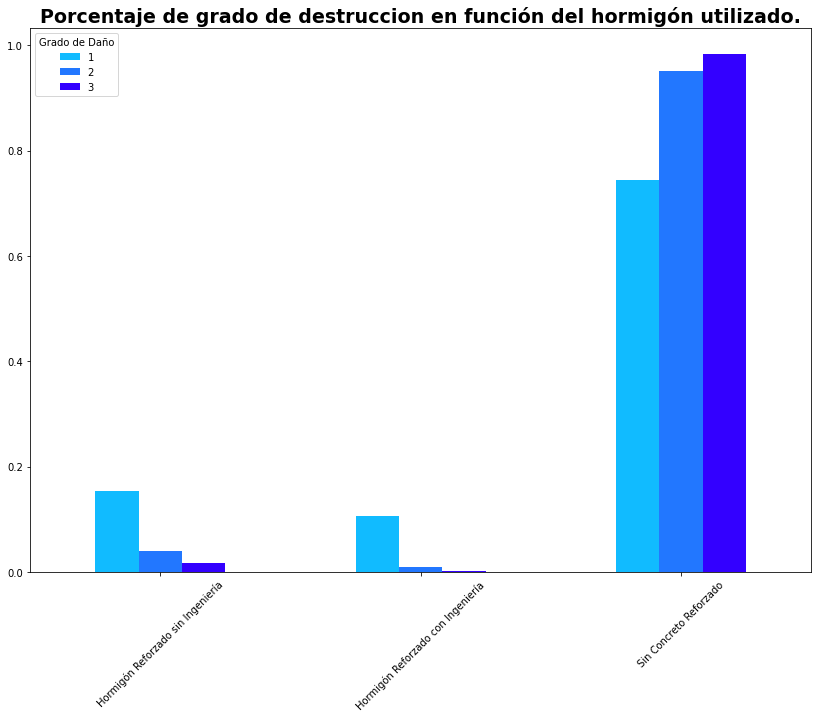

In [50]:
concrete_total_data.T.plot(figsize=(14, 10), kind="bar",\
                           rot = 45,\
                           color = ["#11bbff", "#2277ff", "#3300ff"])
plt.title("Porcentaje de grado de destruccion en función del hormigón utilizado.",\
          fontsize = 19, fontweight = 'bold')

Una estructura que no posee _reinforced concrete_ es mucho más propenso a sufrir daños que sus otras dos contrapartes.

Además, si prestamos atención a la matriz de datos anterior al último gráfico, vemos como el _engineered reinforced concrete_, para cada grado, tiene una probabilidad de sufrir daños menor que el _non-engineered reinforced concrete_.

### Análisis en función del material utilizado

In [10]:
material_data = merged[["damage_grade",\
                        "has_superstructure_cement_mortar_brick", "has_superstructure_mud_mortar_stone"]]
material_data["other_cases"] = material_data["has_superstructure_cement_mortar_brick"] + \
                               material_data["has_superstructure_mud_mortar_stone"]
material_data["other_cases"] = material_data["other_cases"] == 0
material_data

<ipython-input-10-d650930f16f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_data["other_cases"] = material_data["has_superstructure_cement_mortar_brick"] + \
<ipython-input-10-d650930f16f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_data["other_cases"] = material_data["other_cases"] == 0


,damage_grade,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_stone,other_cases
0,3,0,1,False
1,2,0,1,False
2,3,0,1,False
3,2,0,1,False
4,3,0,0,True
...,...,...,...,...
260596,2,0,1,False
260597,3,0,1,False
260598,3,0,1,False
260599,2,1,0,False


In [32]:
material_total_data = material_data.rename(columns = {"damage_grade": "Grado de Daño"})\
                                   .groupby("Grado de Daño").agg("mean")
material_total_data = material_total_data.rename(columns = {
    "has_superstructure_cement_mortar_brick": "Ladrillos de Cemento",
    "has_superstructure_mud_mortar_stone": "Ladrillos de Piedra y Lodo",
    "other_cases": "Otros Casos"
})
material_total_data

,Ladrillos de Cemento,Ladrillos de Piedra y Lodo,Otros Casos
Grado de Daño,,,
1,0.282797,0.348671,0.373746
2,0.077034,0.768567,0.160334
3,0.012486,0.869706,0.119540


Text(0.5, 1.0, 'Porcentaje de grado de destruccion en función del tipo de ladrillo utilizado.')

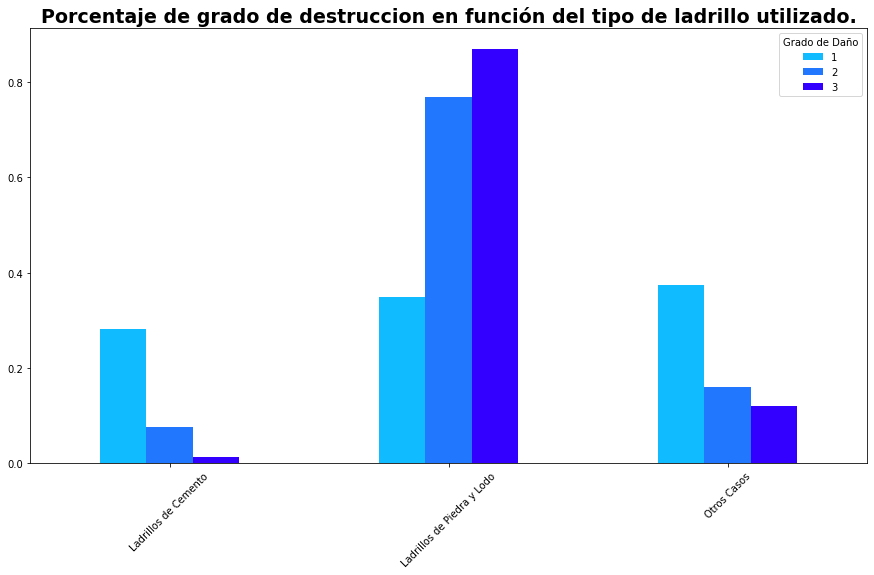

In [51]:
material_total_data.T.plot(figsize=(15, 8), kind="bar",\
                           rot = 45,\
                           color = ["#11bbff", "#2277ff", "#3300ff"])
plt.title("Porcentaje de grado de destruccion en función del tipo de ladrillo utilizado.",\
          fontsize =19, fontweight = 'bold')

Una estructura que se construye de _Mud Mortar - Stone_ sufre en promedio muchos más que el caso donde se usa cemento o el resto.

Y finalmente, en promedio el cemento resulta ser mucho más seguro que el resto de elementos utilizados en las construcciones.